### Import Google Drive

In [46]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as MICE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load dataset

In [47]:
#Read and print the data.csv dataset
data_df = pd.read_excel("/content/drive/MyDrive/NBA_Draft_Prospects_23_21.xlsx")
col_names = data_df.columns.tolist()
print(data_df.head())
print(col_names)


                                                 URL             NAME  Rd  \
0  https://basketball.realgm.com/player/Efe-Abogi...      Efe Abogidi   0   
1  https://basketball.realgm.com/player/Amari-Bai...     Amari Bailey   2   
2  https://basketball.realgm.com/player/Emoni-Bat...      Emoni Bates   2   
3  https://basketball.realgm.com/player/Tarik-Bib...  Tarik Biberovic   2   
4  https://basketball.realgm.com/player/Anthony-B...    Anthony Black   1   

  PrimPos SecPos  AGE          SCHOOL/CLUB    HEIGHT  WEIGHT         STATUS  \
0       C    NaN   22      G League Ignite  6.833333     225       G League   
1       G    NaN   20                 UCLA  6.250000     191       Freshman   
2       G    NaN   20     Eastern Michigan  6.750000     190      Sophomore   
3       F    NaN   23  Fenerbahce (Turkey)  6.583333     218  International   
4       G    NaN   20             Arkansas  6.416667     210       Freshman   

   ... A-TOV% A-STL%  A-BLK%  A-USG%  A-Total S%  A-PPR  A-PPS

### Clean data

In [48]:
stat_option = 1 # 1 Wholeset 2 TotalGame 3 PerGame 4 TotalGame+Misc+Advanced 5 MostRelevant

if stat_option == 1: # Wholeset
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3'])
elif stat_option == 2: # Total Game
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3',
  'P-MIN', 'P-PTS', 'P-FGM', 'P-FGA', 'P-FG%', 'P-3PM', 'P-3PA', 'P-3P%', 'P-FTM', 'P-FTA', 'P-FT%', 'P-OFF', 'P-DEF', 'P-TRB', 'P-AST', 'P-STL', 'P-BLK', 'P-TOV', 'P-PF',
  'M-DblDbl', 'M-TplDbl', 'M-40Pls', 'M-20Reb', 'M-20Ast', 'M-Techs', 'M-HOB', 'M-Ast/TO', 'M-Stt/TO', 'M-FT/FGA', "M-W's", "M-L's", 'M-Win%', 'M-OWS', 'M-DWS', 'M-WS',
  'A-TS%', 'A-eFG%', 'A-ORB%', 'A-DRB%', 'A-TRB%', 'A-AST%', 'A-TOV%', 'A-STL%', 'A-BLK%', 'A-USG%', 'A-Total S%', 'A-PPR', 'A-PPS', 'A-ORtg', 'A-DRtg', 'A-PER'])
elif stat_option == 3: # Per Game
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3',
  'T-MIN', 'T-PTS', 'T-FGM', 'T-FGA', 'T-FG%', 'T-3PM', 'T-3PA', 'T-3P%', 'T-FTM', 'T-FTA', 'T-FT%', 'T-OFF', 'T-DEF', 'T-TRB', 'T-AST', 'T-STL', 'T-BLK', 'T-TOV', 'T-PF',
  'M-DblDbl', 'M-TplDbl', 'M-40Pls', 'M-20Reb', 'M-20Ast', 'M-Techs', 'M-HOB', 'M-Ast/TO', 'M-Stt/TO', 'M-FT/FGA', "M-W's", "M-L's", 'M-Win%', 'M-OWS', 'M-DWS', 'M-WS',
  'A-TS%', 'A-eFG%', 'A-ORB%', 'A-DRB%', 'A-TRB%', 'A-AST%', 'A-TOV%', 'A-STL%', 'A-BLK%', 'A-USG%', 'A-Total S%', 'A-PPR', 'A-PPS', 'A-ORtg', 'A-DRtg', 'A-PER'])
elif stat_option == 4: # TotalGame+Misc+Advanced
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3',
  'P-MIN', 'P-PTS', 'P-FGM', 'P-FGA', 'P-FG%', 'P-3PM', 'P-3PA', 'P-3P%', 'P-FTM', 'P-FTA', 'P-FT%', 'P-OFF', 'P-DEF', 'P-TRB', 'P-AST', 'P-STL', 'P-BLK', 'P-TOV', 'P-PF'])
elif stat_option == 5: # Most Relevant
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3'])

else:
  print("No option selected.")

'''
['URL', 'NAME', 'Rd', 'PrimPos', 'SecPos', 'AGE', 'SCHOOL/CLUB', 'HEIGHT', 'WEIGHT', 'STATUS', 'COUNTRY',
'GP', 'GS', 'P-MIN', 'P-PTS', 'P-FGM', 'P-FGA', 'P-FG%', 'P-3PM', 'P-3PA', 'P-3P%', 'P-FTM', 'P-FTA', 'P-FT%', 'P-OFF', 'P-DEF', 'P-TRB', 'P-AST', 'P-STL', 'P-BLK', 'P-TOV', 'P-PF',
'GP.1', 'GS.1', 'T-MIN', 'T-PTS', 'T-FGM', 'T-FGA', 'T-FG%', 'T-3PM', 'T-3PA', 'T-3P%', 'T-FTM', 'T-FTA', 'T-FT%', 'T-OFF', 'T-DEF', 'T-TRB', 'T-AST', 'T-STL', 'T-BLK', 'T-TOV', 'T-PF',
'GP.2', 'M-DblDbl', 'M-TplDbl', 'M-40Pls', 'M-20Reb', 'M-20Ast', 'M-Techs', 'M-HOB', 'M-Ast/TO', 'M-Stt/TO', 'M-FT/FGA', "M-W's", "M-L's", 'M-Win%', 'M-OWS', 'M-DWS', 'M-WS',
'GP.3', 'A-TS%', 'A-eFG%', 'A-ORB%', 'A-DRB%', 'A-TRB%', 'A-AST%', 'A-TOV%', 'A-STL%', 'A-BLK%', 'A-USG%', 'A-Total S%', 'A-PPR', 'A-PPS', 'A-ORtg', 'A-DRtg', 'A-PER']
'''
print(df.head())

   Rd PrimPos  AGE    HEIGHT  WEIGHT         STATUS  GP    GS  P-MIN  P-PTS  \
0   0       C   22  6.833333     225       G League  37  29.0   20.8   8.05   
1   2       G   20  6.250000     191       Freshman  30  29.0   26.8  11.17   
2   2       G   20  6.750000     190      Sophomore  30  30.0   33.5  19.23   
3   2       F   23  6.583333     218  International  36   8.0   13.1   4.50   
4   1       G   20  6.416667     210       Freshman  36  35.0   34.3  12.78   

   ...  A-TOV%  A-STL%  A-BLK%  A-USG%  A-Total S%  A-PPR  A-PPS  A-ORtg  \
0  ...   12.96    2.55    9.46   19.03      152.98  -3.09   1.42   121.0   
1  ...   19.42    2.49    1.35   23.83      158.18  -3.73   1.23   101.1   
2  ...   12.20    1.24    1.83   31.58      151.74  -4.66   1.21   101.8   
3  ...   11.78    1.77    0.46   18.07      154.30  -2.28   1.09   104.4   
4  ...   20.63    3.37    1.85   21.29      145.92  -1.18   1.40   104.8   

   A-DRtg  A-PER  
0    89.2  25.47  
1    92.3  16.90  
2   113.9  

In [49]:
# Exclude rows with 'G League', 'International', 'Overtime Elite', 'Draft Eligible', and 'Post-Graduate' status

df = df[(df['STATUS'] != 'G League') & (df['STATUS'] != 'International') & (df['STATUS'] != 'Overtime Elite')
& (df['STATUS'] != 'Draft Eligible') & (df['STATUS'] != 'Post-Graduate')]

df_status_unique = df['STATUS'].unique()
print(df_status_unique)

#Change status values into numerical values
d = {'Freshman':1, 'Sophomore':2, 'Junior':3, 'Senior':4}
df['STATUS'] = df['STATUS'].map(d)
print(df)

# df = df.drop(columns=['STATUS'])
# print(df)

['Freshman' 'Sophomore' 'Senior' 'Junior']
     Rd PrimPos  AGE    HEIGHT  WEIGHT  STATUS  GP    GS  P-MIN  P-PTS  ...  \
1     2       G   20  6.250000     191       1  30  29.0   26.8  11.17  ...   
2     2       G   20  6.750000     190       2  30  30.0   33.5  19.23  ...   
4     1       G   20  6.416667     210       1  36  35.0   34.3  12.78  ...   
5     1       G   24  6.583333     252       4  34  33.0   29.5  15.82  ...   
6     1       G   20  6.333333     187       2  33  33.0   34.0  14.00  ...   
..   ..     ...  ...       ...     ...     ...  ..   ...    ...    ...  ...   
243   2       G   25  6.500000     200       3  31  30.0   33.0  14.45  ...   
244   1       F   22  6.666667     185       1  20  14.0   27.8  10.70  ...   
245   0       F   25  6.750000     233       4  25  25.0   35.4  17.40  ...   
246   0       G   25  6.083333     196       4  32  32.0   32.5  15.22  ...   
247   2       G   25  6.166667     180       3  29  29.0   33.6  15.83  ...   

     A-T

In [50]:
# Exclude rows with No NCAA data label in GP column
df = df[df['GP'] != 'No NCAA data'] # drop row with NaN
df.dropna(subset=['GS'], inplace=True)

In [51]:
# Convert PrimPos to numerical values
df_pos_unique = df['PrimPos'].unique()
print(df_pos_unique)

#Change string values into numerical values
d_pos = {'G':1, 'F':2, 'C':3} # Guard = 1, Forward = 2, Center = 3
df['PrimPos'] = df['PrimPos'].map(d_pos)

print(df)

['G' 'F' 'C']
     Rd  PrimPos  AGE    HEIGHT  WEIGHT  STATUS  GP    GS  P-MIN  P-PTS  ...  \
1     2        1   20  6.250000     191       1  30  29.0   26.8  11.17  ...   
2     2        1   20  6.750000     190       2  30  30.0   33.5  19.23  ...   
4     1        1   20  6.416667     210       1  36  35.0   34.3  12.78  ...   
5     1        1   24  6.583333     252       4  34  33.0   29.5  15.82  ...   
6     1        1   20  6.333333     187       2  33  33.0   34.0  14.00  ...   
..   ..      ...  ...       ...     ...     ...  ..   ...    ...    ...  ...   
243   2        1   25  6.500000     200       3  31  30.0   33.0  14.45  ...   
244   1        2   22  6.666667     185       1  20  14.0   27.8  10.70  ...   
245   0        2   25  6.750000     233       4  25  25.0   35.4  17.40  ...   
246   0        1   25  6.083333     196       4  32  32.0   32.5  15.22  ...   
247   2        1   25  6.166667     180       3  29  29.0   33.6  15.83  ...   

     A-TOV%  A-STL%  A-BL

In [52]:
pos_option = 3 # all positions 0, guard 1, forward 2, center 3

if pos_option == 0: # all positions 0
  pass# Do nothing
elif pos_option == 1: # guard 1
  df = df[df['PrimPos'] == 1]
elif pos_option == 2: # forward 2
  df = df[df['PrimPos'] == 2]
elif pos_option == 3: # center 3
  df = df[df['PrimPos'] == 3]
else:
  print("No position is selected.")

# # Split dataset based on position
# F_df = df[df['PrimPos'] == 2]
# C_df = df[df['PrimPos'] == 3]
# G_df = df[df['PrimPos'] == 1]


df = df.drop(columns=['PrimPos'])
col_names = df.columns.tolist()
print(df.head())

    Rd  AGE    HEIGHT  WEIGHT  STATUS  GP    GS  P-MIN  P-PTS  P-FGM  ...  \
20   2   23  6.916667     213       2  33  33.0   32.2  14.30   5.64  ...   
35   1   20  7.083333     230       1  34  24.0   20.6   5.21   2.26  ...   
61   0   23  6.833333     235       4  37  35.0   31.6  21.24   8.46  ...   
62   0   24  6.583333     235       4  32  30.0   33.5  16.47   6.09  ...   
91   0   24  7.083333     293       3  28  28.0   30.7  20.89   8.07  ...   

    A-TOV%  A-STL%  A-BLK%  A-USG%  A-Total S%  A-PPR  A-PPS  A-ORtg  A-DRtg  \
20   14.79    1.57    2.73   26.21      143.74  -3.51   1.24   109.0    98.7   
35   14.68    1.47   12.54   11.58      141.20   0.25   1.51   134.0    89.9   
61   13.31    1.09    3.34   30.13      141.44  -1.36   1.55   124.0   102.2   
62   12.94    2.89    3.31   23.45      128.91  -3.03   1.51   126.8    94.9   
91   11.98    1.57    2.97   32.39      124.83  -5.95   1.54   119.0    94.9   

    A-PER  
20  22.21  
35  22.87  
61  31.28  
62  31.6

In [53]:
# Convert Rd != 0 to Rd = 1
df.loc[df['Rd'] != 0, 'Rd'] = 1
df_Rd_unique = df['Rd'].unique
print(df_Rd_unique)

<bound method Series.unique of 20     1
35     1
61     0
62     0
91     0
98     1
106    1
114    1
115    1
153    1
155    1
164    1
184    1
205    0
210    1
215    1
225    1
229    1
Name: Rd, dtype: int64>


### Load data

In [54]:
# Whole dataset
X = df.drop(columns=['Rd'])
y = df['Rd']

# print(X)
# print(y)

### KNN
https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features

https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py

In [55]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler().fit(x_train)
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

#Train KNN
KNN = KNeighborsClassifier(n_neighbors=7) #, weights='distance', metric='euclidean'
KNN = KNN.fit(x_scaled_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = KNN.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# Create a pipeline with scaling and KNN
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7))

# Perform 4-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Accuracy: 1.0
Cross-validation scores: [0.75       0.75       0.75       1.         0.66666667]
Mean CV accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

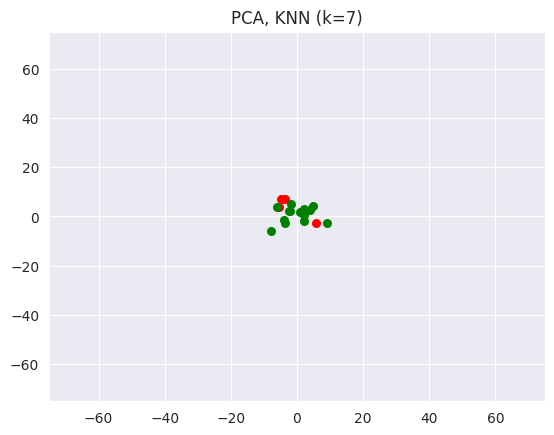

<Figure size 640x480 with 0 Axes>

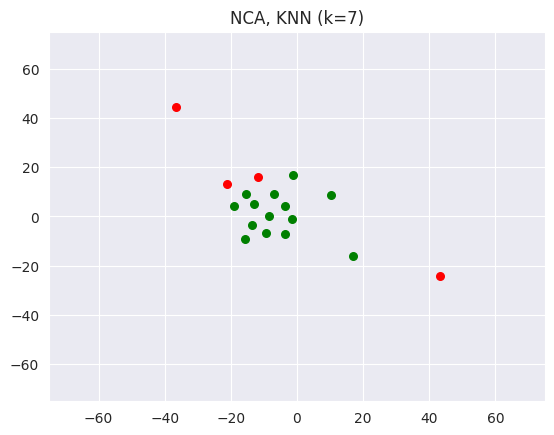

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 7
random_state = 0

# # Load Digits dataset
# X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

dim = len(X)
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Define custom colors for each class
    custom_colors = ['red', 'green']

    # Plot the projected points and show the evaluation score
    plt.figure()
    for i in range(2):
        plt.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], alpha = 1, c=custom_colors[i], label=str(i), s=30)


    # Plot the projected points and show the evaluation score
    # plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})".format(name, n_neighbors)
    )
    #add style to this graph with seaborn
    # sns.set_style("whitegrid")
    sns.set_style("darkgrid")
    # Define scale for the plot
    plt.xlim(-75, 75)  # Set x-axis limits
    plt.ylim(-75, 75)  # Set y-axis limits
plt.show()